# Dependence of $\text{Var}\langle \partial C(\mathbf{\theta})/\partial \theta_i\rangle$ on a local and global cost function.


In this notebook, we see the dependence of $\text{Var}\langle \partial C(\mathbf{\theta})/\partial \theta_i\rangle$ on the ansatz structure.

<font size="3">

- ansatz: the parametrized circuit to learn the training dataset.
    There are 3 types of ansatz circuits used below:
    - Tensor Product Ansatz (TPA): ansatz circuit is a tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): ansatz circuit is a tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): ansatz circuit that is strongly entangled.

On `HEA`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)
</font>

In [1]:
import pickle
import sys

import pennylane as qml
from pennylane import numpy as np

sys.path.append('..')
from src.barren_plateau import BarrenPlateau

## $\text{Var}\langle \partial C(\mathbf{\theta})/\partial \theta_i\rangle$ vs the number of qubits

In [2]:
# execute
nqubits_list = [2,4,6,8,10]
nlayers= [1]; nsamples=10; shots=None

# If shots is None, the simulator returns analytic results.
# If observable is None, the simulator returns the expectation value of a global observable |0><0|^{\otimes n}.

### Local observable

nqubits 2,  observable size 2^1 * 2^1
nqubits 4,  observable size 2^1 * 2^1
nqubits 6,  observable size 2^1 * 2^1
nqubits 8,  observable size 2^1 * 2^1
nqubits 10,  observable size 2^1 * 2^1


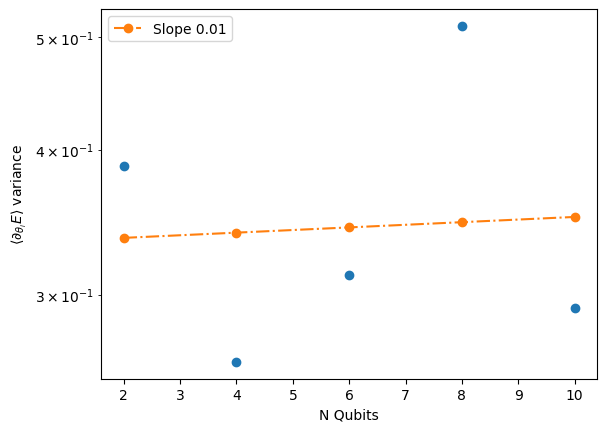

In [4]:
ansatz_type= 'TPA'; observable = qml.PauliZ(0) # local observable

bp_nqubits_ = BarrenPlateau(nqubits_list, nlayers, ansatz_type, nsamples, shots, observable)
bp_nqubits_.bp_nqubits() # returns means and variances of the gradients
bp_nqubits_.plot_bp_nqubits()

### Global observable

nqubits 2,  observable size 2^2 * 2^2
nqubits 4,  observable size 2^4 * 2^4
nqubits 6,  observable size 2^6 * 2^6
nqubits 8,  observable size 2^8 * 2^8
nqubits 10,  observable size 2^10 * 2^10


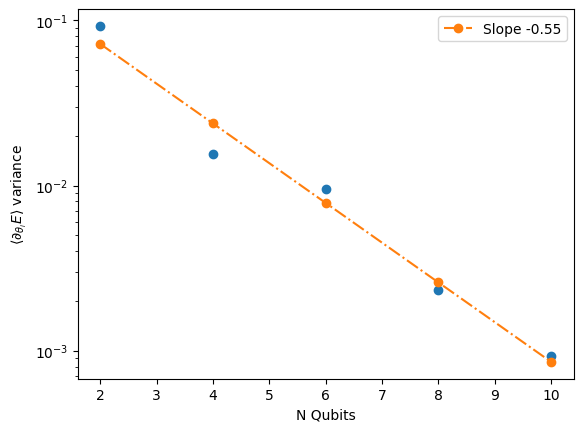

In [5]:
ansatz_type= 'TPA'; observable = None # global observable

bp_nqubits_ = BarrenPlateau(nqubits_list, nlayers, ansatz_type, nsamples, shots, observable)
bp_nqubits_.bp_nqubits() # returns means and variances of the gradients
bp_nqubits_.plot_bp_nqubits()

## $\text{Var}\langle \partial C(\mathbf{\theta})/\partial \theta_i\rangle$ vs the number of layers

In [ ]:
## execute
nqubits_list = [3,4,5,6,8,10]
nlayers_list = [2,4,6,8,10,20]
nsamples = 10; shots = None

local_observable = qml.PauliZ(0)
global_observable = None
observables = [local_observable, global_observable]
bp_nlayers_list = []

for a in ['TPA', 'SEA', 'HEA']:
    for observable in observables:
        if observable is not None:
            print(f'{a}, local observable: PauliZ(0)')
        else:
            print(f'{a}, global observable: |0><0|^\otimes n')

        bp_nlayers = BarrenPlateau(nqubits_list, nlayers_list, a, nsamples, shots, observable)
        bp_nlayers.bp_nlayers()

        if observable is not None:
            bp_nlayers_list.append([f'{a}, local observable: PauliZ(0)', bp_nlayers])
        else:
            bp_nlayers_list.append([f'{a}, global observable: $|0><0|^{\otimes n}$', bp_nlayers])

In [5]:
# path = '../results/data/bp_nlayers_list.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(bp_nlayers_list, f)

In [6]:
path = '../results/data/bp_nlayers_list.pkl'
with open(path, 'rb') as f:
    bp_nlayers_list = pickle.load(f)

TPA, local observable: PauliZ(0)


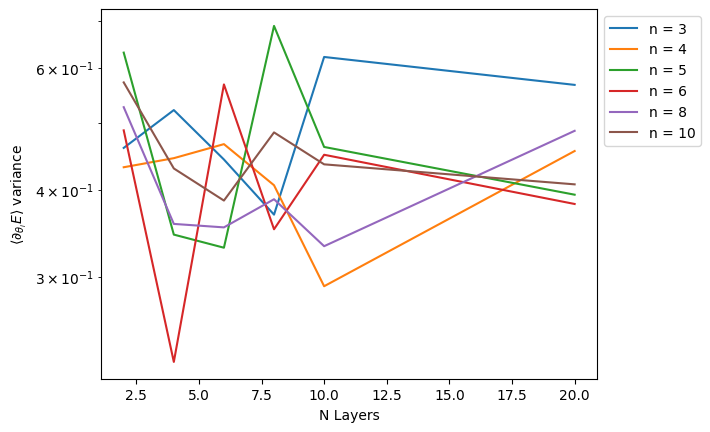

TPA, global observable: |0><0|^\otimes n


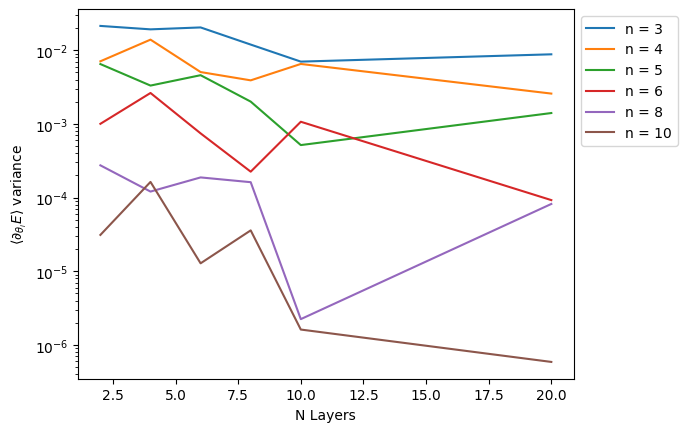

SEA, local observable: PauliZ(0)


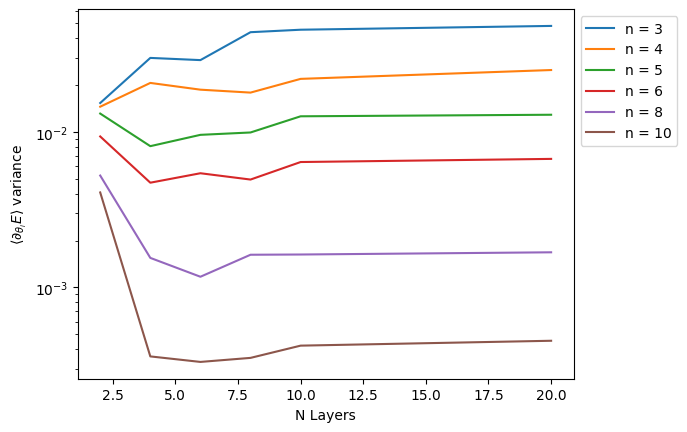

SEA, global observable: |0><0|^\otimes n


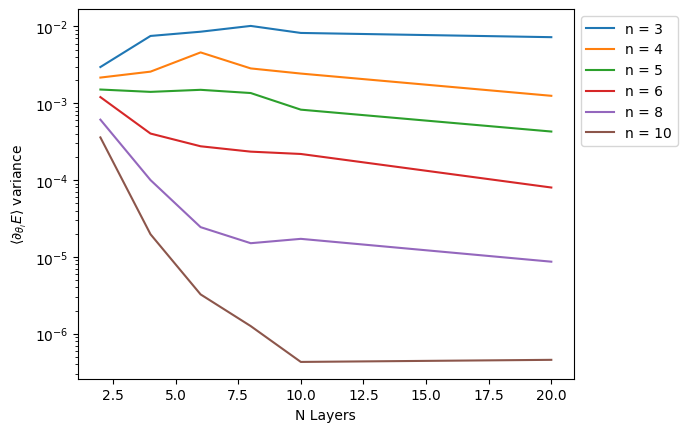

HEA, local observable: PauliZ(0)


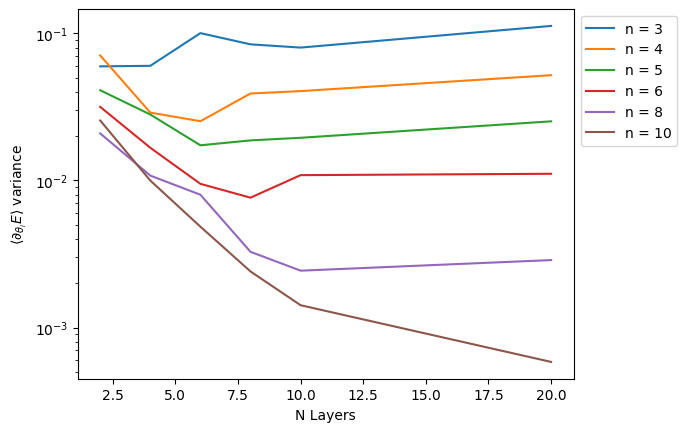

HEA, global observable: |0><0|^\otimes n


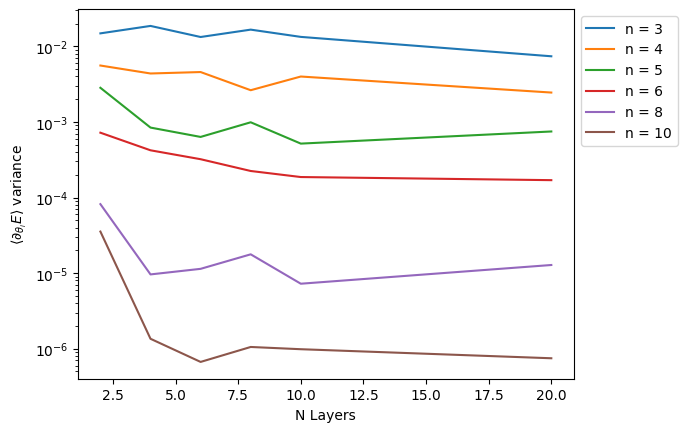

In [7]:
for bp_nlayers in bp_nlayers_list:
    print(bp_nlayers[0])
    bp_nlayers[1].plot_bp_nlayers()